<a href="https://colab.research.google.com/github/cam2149/MachineLearningIII/blob/main/fundamentos_de_anal%C3%ADtica_ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses. Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.

In [1]:
#@title 1. Carga de paquetes
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error



In [16]:
#@title 2. Carga de datos
# Load the data
data = pd.read_excel("https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
# Select the 'Ocupados' column
ds_ocupados = data[["Ocupados"]]

(220, 1)


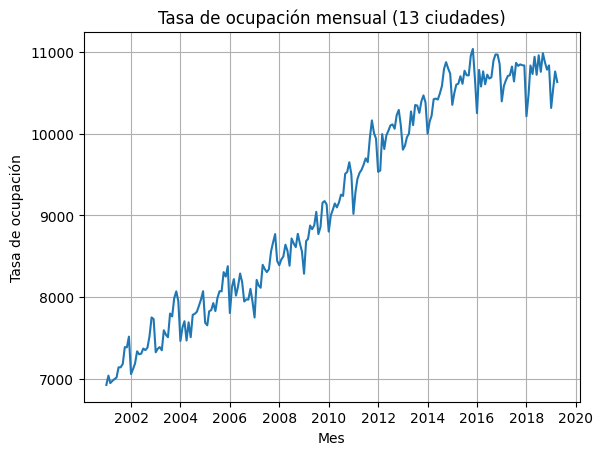

In [7]:
# imprimiendo el tamano del dataframe
print(ds_ocupados.shape)

# Graficando los datos
plt.title("Tasa de ocupación mensual (13 ciudades)")
plt.xlabel("Mes")
plt.ylabel("Tasa de ocupación")
plt.plot(ds_ocupados)
plt.grid()
plt.show()

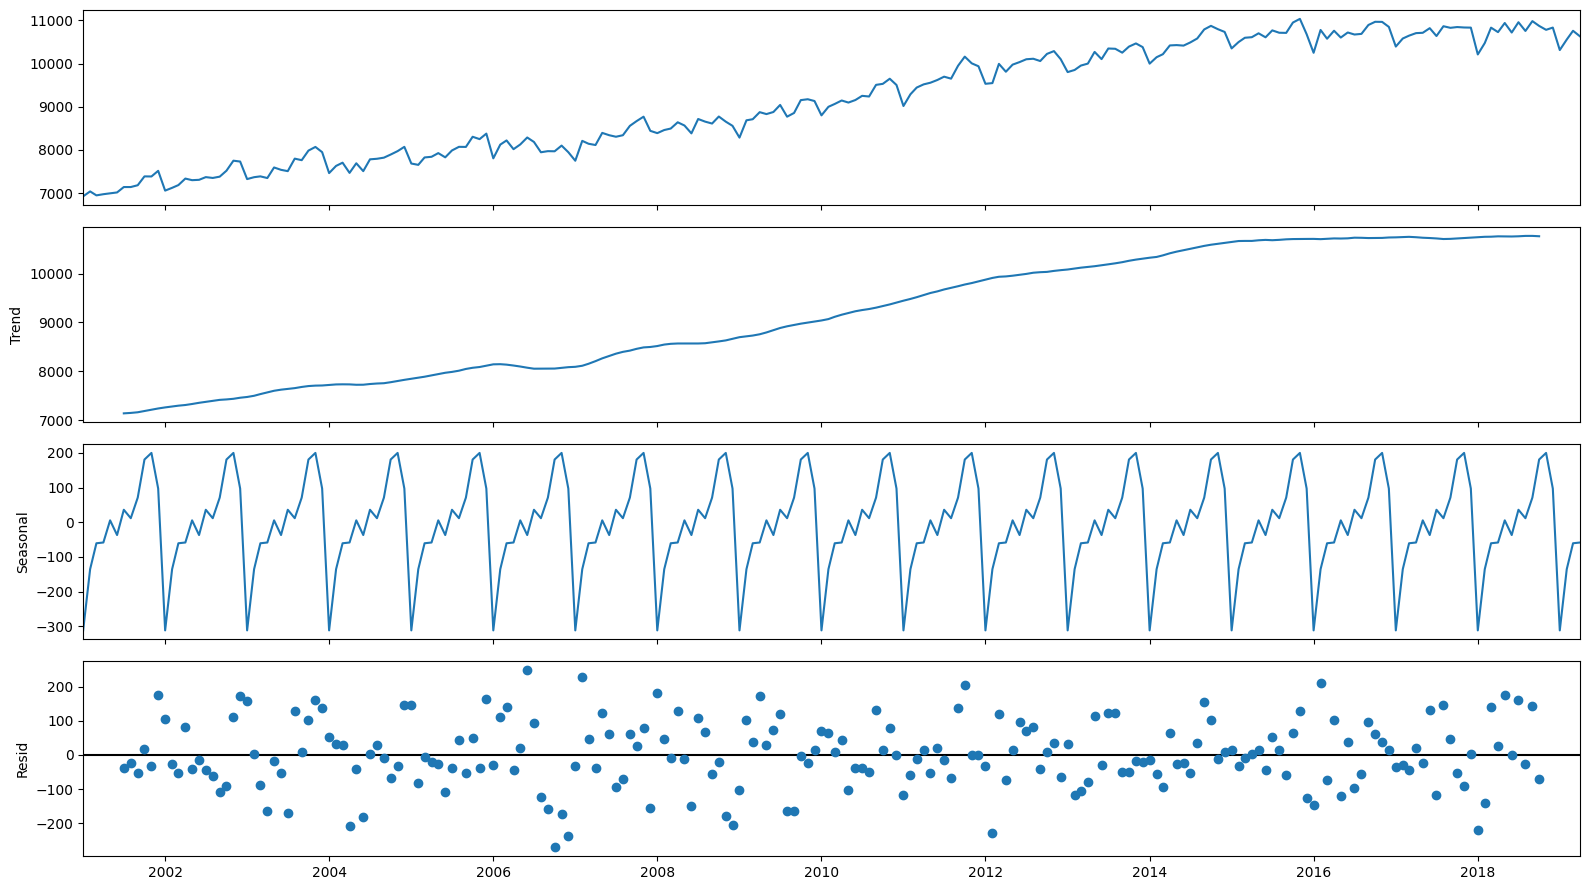

In [14]:
#@title 3. Encontrando los componentes de una serie de tiempo
td_componentes = seasonal_decompose(ds_ocupados,model="additive")
fig = td_componentes.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

In [11]:
td_componentes.seasonal

,seasonal
mes,
2001-01-01,-311.454885
2001-02-01,-135.216366
2001-03-01,-60.470657
2001-04-01,-58.270721
2001-05-01,5.551095
...,...
2018-12-01,97.140345
2019-01-01,-311.454885
2019-02-01,-135.216366


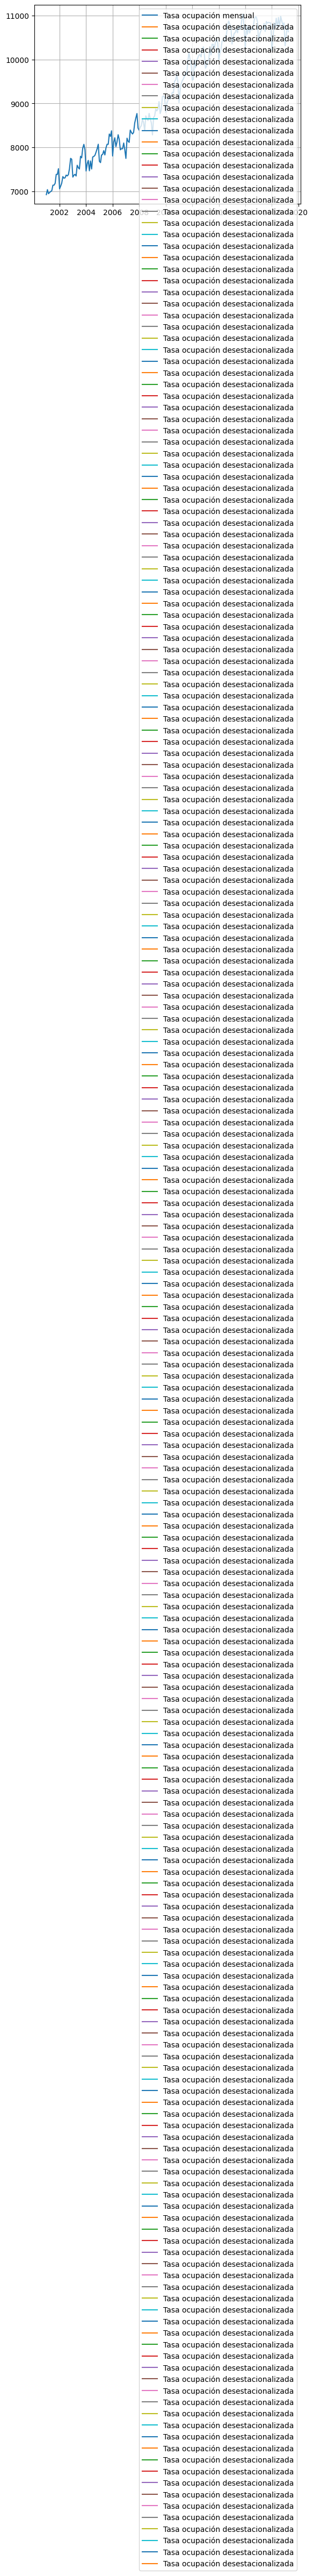

In [15]:
td_desestacionalizada = ds_ocupados-td_componentes.seasonal

plt.plot(ds_ocupados,label="Tasa ocupación mensual")
plt.plot(td_desestacionalizada,label="Tasa ocupación desestacionalizada")
plt.legend()
plt.grid()
plt.show()

In [6]:
# Split the data into training and testing sets
train_len = 208
train_ocupados = ds_ocupados[:train_len]
test_ocupados = ds_ocupados[train_len:]
